#### This ntb is meant as an update of CEE countries (and regions) competitivness.
The main focus will be on the current value of ULC (Unit Laboru Cost) as outlined by Dustmann et al. (2014) for Germany (or maybe its preliminary version)
and some Figures summing up sectoral specialization inspired by Schröder (2020) - underlying question: is Manufacturing core holding, and is it still bind together by attraction of the lowest ULC?

In [115]:
import pandas as pd
#import pandas_datareader as pdr
import requests

from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

from helper import oecd_res2df

In [1]:
import eurostat
import pyreadr

In [62]:
from importlib import reload
import helper
reload(helper)
from helper import oecd_res2df

In [233]:
visegrad = {'CZ': "Czech Republic", 'HU': "Hungary", 'PL': "Poland", 'SK': "Slovak Republic"}
CEE_non_core = {'RO': 'Romania', 'BG': 'Bulgaria', 'EE': 'Estonia', 'LT': 'Lithuania', 'LV': 'Latvia', 'SI': 'Slovenia'}
germany_plus = {'DE': 'Germany', 'AT': "Austria"}
southern = {'IT': 'Italy', 'ES': 'Spain', 'PT': 'Portugal', 'GR': 'Greece'}
west = {'NL': 'Netherlands', 'BE': 'Belgium', 'UK': 'United Kingdom', 'FR': 'France', 'LU': 'Luxembourg', 'IR': 'Ireland'}
north = {'NOR': 'Norway', 'SE': 'Sweden', 'DK': 'Denmark', 'FI': 'Finland'}

### Dustmann (2014) - Figure 1 = ULC

In [107]:
### Dustmann (2014) - Figure 1
# 'ULC_EEQ'
#ulc_eeq_query = "https://stats.oecd.org/SDMX-JSON/data/ULC_EEQ/AUS+AUT+BEL+CAN+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+IRL+ISR+ITA+JPN+KOR+LVA+LTU+LUX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+SWE+CHE+TUR+GBR+USA.ULQEUL01+ULQECU01+ULQELP01.IXOB+IXOBSA+GPSA+GYSA.Q/all?startTime=2010-Q1&endTime=2022-Q1&dimensionAtObservation=allDimensions"
ulc_eeq_query = "https://stats.oecd.org/SDMX-JSON/data/ULC_EEQ/AUS+AUT+BEL+CAN+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+IRL+ISR+ITA+JPN+KOR+LVA+LTU+LUX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+SWE+CHE+TUR+GBR+USA.ULQEUL01.IXOB.Q/all?startTime=2010-Q1&endTime=2022-Q1&dimensionAtObservation=allDimensions"

In [ ]:
r = requests.get(ulc_eeq_query)
r_dt = r.json()
df = oecd_res2df(r_dt)
df.info()
df.head()

ulc_df = df.melt(id_vars=['country'], var_name='quarter', value_name='index')
ulc_df['index'] = ulc_df['index'].astype('float')

In [234]:
t_period = ulc_df["quarter"].str.split("-", n = 1, expand = True)
ulc_df['year'] = t_period[0].astype('int')
ulc_df = ulc_df.sort_values('year')
ulc_yr = ulc_df.groupby(['country', 'year']).agg({'index': 'mean'}).reset_index()

ulc_yr['region'] = np.where(ulc_yr['country'].isin(visegrad.values()), "visegrad", 
                            np.where(ulc_yr['country'].isin(southern.values()), 'south',
                                     np.where(ulc_yr['country'].isin(germany_plus.values()), 'DE_AT',
                                              np.where(ulc_yr['country'].isin(west.values()), 'west',
                                                       np.where(ulc_yr['country'].isin(north.values()), 'north',
                                                                np.where(ulc_yr['country'].isin(CEE_non_core.values()), 'CEE_non_core', 'rest')
                                                               )
                                                        )
                                                ) 
                                    )
                            )


### The picture below suggest:
- higher ULC growth in CEE since 2015 than in the Western Europe
- development in the rest of the CEE is similar (this can be important as they are possible competitors) NOTE: RO+BG note contained
- continuos rise of the ULC after 2019 while the West goes to a decrease
- examining the components of the time series, we can see that the rise is comprised above all of rising per employee compensation (higher than in DE) and not so fast rising physical productivity (in the the sense of GDP per employee change, NOTE: however that productivity is actually rising faster in CEE than in the West)

Does this threaten the CEE position as Manufacturing Core? Is it a sign of transformation of the economic model

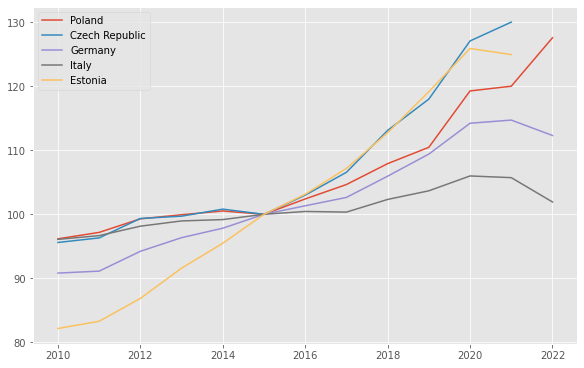

In [232]:
ulc_yr_plot = ulc_yr.groupby('country')
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(ulc_yr_plot.get_group('Poland')['year'], ulc_yr_plot.get_group('Poland')['index'], label='Poland')
    ax.plot(ulc_yr_plot.get_group('Czech Republic')['year'], ulc_yr_plot.get_group('Czech Republic')['index'], label='Czech Republic')
    ax.plot(ulc_yr_plot.get_group('Germany')['year'], ulc_yr_plot.get_group('Germany')['index'], label='Germany')
    ax.plot(ulc_yr_plot.get_group('Italy')['year'], ulc_yr_plot.get_group('Italy')['index'], label='Italy')
    ax.plot(ulc_yr_plot.get_group('Estonia')['year'], ulc_yr_plot.get_group('Estonia')['index'], label='Estonia')
    #ax.plot(ulc_yr_plot.get_group('Türkiye')['year'], ulc_yr_plot.get_group('Türkiye')['index'], label='Türkiye') # NOTE: extreme values for Turkey


    ax.legend()

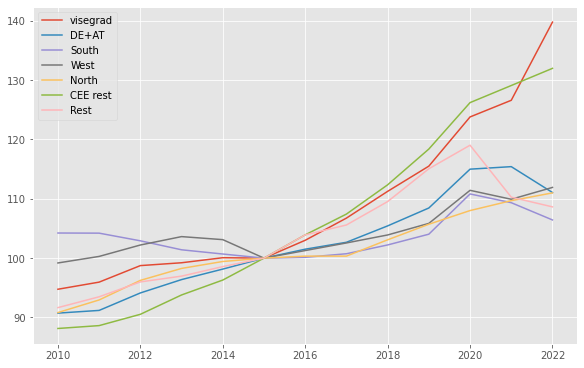

In [240]:
ulc_yr_regions = ulc_yr.groupby(['region', 'year']).agg({'index': 'mean'}).reset_index().groupby('region')
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(ulc_yr_regions.get_group('visegrad')['year'], ulc_yr_regions.get_group('visegrad')['index'], label='visegrad')
    ax.plot(ulc_yr_regions.get_group('DE_AT')['year'], ulc_yr_regions.get_group('DE_AT')['index'], label='DE+AT')
    ax.plot(ulc_yr_regions.get_group('south')['year'], ulc_yr_regions.get_group('south')['index'], label='South')
    ax.plot(ulc_yr_regions.get_group('west')['year'], ulc_yr_regions.get_group('west')['index'], label='West')
    ax.plot(ulc_yr_regions.get_group('north')['year'], ulc_yr_regions.get_group('north')['index'], label='North')
    ax.plot(ulc_yr_regions.get_group('CEE_non_core')['year'], ulc_yr_regions.get_group('CEE_non_core')['index'], label='CEE rest')
    ax.plot(ulc_yr_regions.get_group('rest')['year'], ulc_yr_regions.get_group('rest')['index'], label='Rest')
# NOTE: no RO + BG in OECD data -  CEE rest are only Baltics


    ax.legend()

In [236]:
ulc_yr.groupby(['region', 'year']).get_group(('rest', 2014))['country'].unique()

array(['Australia', 'Israel', 'Japan', 'Korea', 'New Zealand',
       'Switzerland', 'Türkiye'], dtype=object)

### Specialization on Manufacturing - still relevant?

In [ ]:
# nama_10_a10
# nama_10_a10_e
# resp. regional: NAMA_10R_2EMHRW

# OECD SNA_TABLE6 ???

##### Employment

In [246]:
nama_10_a10_e = eurostat.get_data_df("nama_10_a10_e").rename(columns={"geo\\time": "Country"})
nama_10_a10_e = nama_10_a10_e.loc[np.where((
                                  (nama_10_a10_e['unit'] == "PC_TOT_HW") & # Percentage of total (based on hours worked)
                                  (nama_10_a10_e['na_item'] == "EMP_DC") &
                                  (nama_10_a10_e['nace_r2'] == "C")
                                ))]
spec_employ = nama_10_a10_e.melt(id_vars = ['Country', 'nace_r2'], value_vars = range(2005, 2021),
                   var_name = 'year', value_name = 'employ_share')
spec_employ['year'] = spec_employ['year'].astype(int)


spec_employ['region'] = np.where(spec_employ['Country'].isin(visegrad), "visegrad", 
                                 np.where(spec_employ['Country'].isin(southern), 'south',
                                          np.where(spec_employ['Country'].isin(germany_plus), 'DE_AT',
                                                   np.where(spec_employ['Country'].isin(west), 'west',
                                                            np.where(spec_employ['Country'].isin(north), 'north',
                                                                    np.where(spec_employ['Country'].isin(CEE_non_core), 'CEE_non_core', 'rest')
                                                                    )
                                                           )
                                                  )
                                         )
                                 )

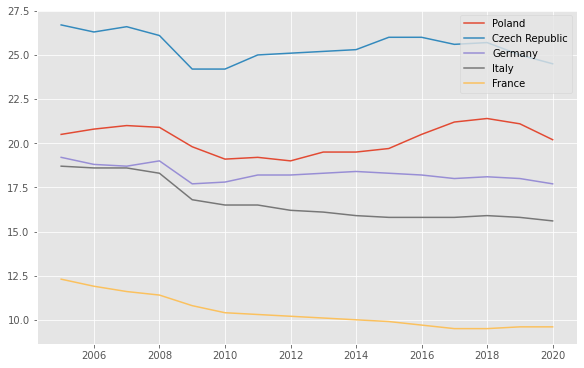

In [206]:
# Figure 2
spec_employ_plot = spec_employ.groupby('Country')
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(spec_employ_plot.get_group('PL')['year'], spec_employ_plot.get_group('PL')['employ_share'], label='Poland')
    ax.plot(spec_employ_plot.get_group('CZ')['year'], spec_employ_plot.get_group('CZ')['employ_share'], label='Czech Republic')
    ax.plot(spec_employ_plot.get_group('DE')['year'], spec_employ_plot.get_group('DE')['employ_share'], label='Germany')
    ax.plot(spec_employ_plot.get_group('IT')['year'], spec_employ_plot.get_group('IT')['employ_share'], label='Italy')
    ax.plot(spec_employ_plot.get_group('FR')['year'], spec_employ_plot.get_group('FR')['employ_share'], label='France')

    ax.legend()

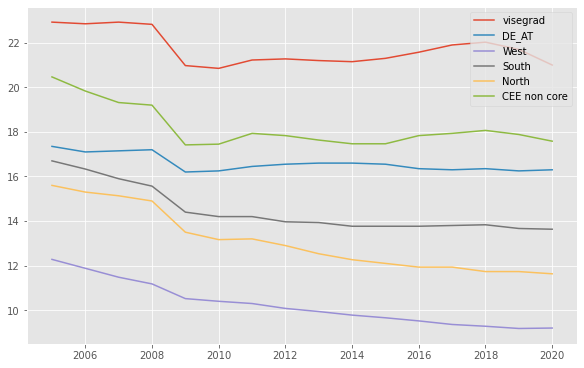

In [250]:
# Figure 2 - aggregated regions
spec_employ_regions = spec_employ.groupby(['region', 'year']).agg({'employ_share': 'mean'}).reset_index().groupby('region')
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(spec_employ_regions.get_group('visegrad')['year'], spec_employ_regions.get_group('visegrad')['employ_share'], label='visegrad')
    ax.plot(spec_employ_regions.get_group('DE_AT')['year'], spec_employ_regions.get_group('DE_AT')['employ_share'], label='DE_AT')
    ax.plot(spec_employ_regions.get_group('west')['year'], spec_employ_regions.get_group('west')['employ_share'], label='West')
    ax.plot(spec_employ_regions.get_group('south')['year'], spec_employ_regions.get_group('south')['employ_share'], label='South')
    #ax.plot(spec_employ_regions.get_group('north')['year'], spec_employ_regions.get_group('north')['employ_share'], label='North')
    ax.plot(spec_employ_regions.get_group('CEE_non_core')['year'], spec_employ_regions.get_group('CEE_non_core')['employ_share'], label='CEE non core')
    ax.legend()

In [248]:
spec_employ.groupby(['region', 'year']).get_group(('rest', 2014))['Country'].unique()

array(['CY', 'EA', 'EA12', 'EA19', 'EL', 'EU15', 'EU27_2020', 'EU28',
       'HR', 'IE', 'IS', 'MT', 'NO', 'RS', 'XK'], dtype=object)

#### Value added

In [252]:
nama_10_a10 = eurostat.get_data_df("nama_10_a10").rename(columns={"geo\\time": "Country"})
nama_10_a10 = nama_10_a10.loc[np.where((
                                  (nama_10_a10['unit'] == "PC_GDP") & # Percentage of gross domestic product (GDP)
                                  (nama_10_a10['na_item'] == "B1G") &
                                  (nama_10_a10['nace_r2'] == "C")
                                ))]
spec_gva = nama_10_a10.melt(id_vars = ['Country', 'nace_r2'], value_vars = range(2005, 2021),
                   var_name = 'year', value_name = 'gva_share')
spec_gva['year'] = spec_gva['year'].astype(int)

spec_gva['region'] = np.where(spec_gva['Country'].isin(visegrad), "visegrad", 
                            np.where(spec_gva['Country'].isin(southern), 'south',
                                     np.where(spec_gva['Country'].isin(germany_plus), 'DE_AT',
                                              np.where(spec_gva['Country'].isin(west), 'west', 
                                                       np.where(spec_gva['Country'].isin(north), 'north',
                                                                np.where(spec_gva['Country'].isin(CEE_non_core), 'CEE_non_core', 'rest')
                                                                )
                                                      )
                                              )
                                    )
                            )

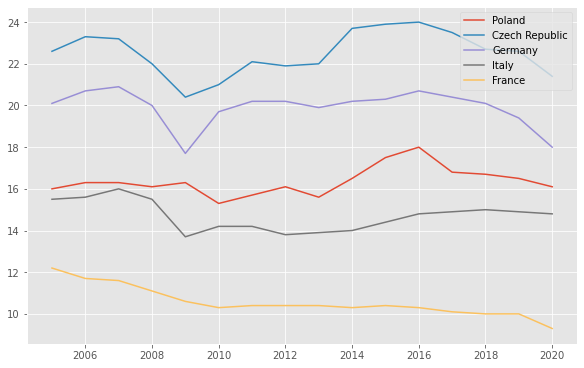

In [253]:
# Figure 3 VA specialization
spec_gva_plot = spec_gva.groupby('Country')

with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(spec_gva_plot.get_group('PL')['year'], spec_gva_plot.get_group('PL')['gva_share'], label='Poland')
    ax.plot(spec_gva_plot.get_group('CZ')['year'], spec_gva_plot.get_group('CZ')['gva_share'], label='Czech Republic')
    ax.plot(spec_gva_plot.get_group('DE')['year'], spec_gva_plot.get_group('DE')['gva_share'], label='Germany')
    ax.plot(spec_gva_plot.get_group('IT')['year'], spec_gva_plot.get_group('IT')['gva_share'], label='Italy')
    ax.plot(spec_gva_plot.get_group('FR')['year'], spec_gva_plot.get_group('FR')['gva_share'], label='France')

    ax.legend()

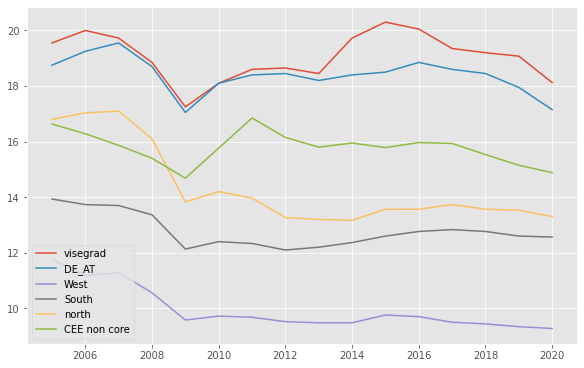

In [255]:
# Figure 2 - aggregated regions
spec_gva_regions = spec_gva.groupby(['region', 'year']).agg({'gva_share': 'mean'}).reset_index().groupby('region')
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(spec_gva_regions.get_group('visegrad')['year'], spec_gva_regions.get_group('visegrad')['gva_share'], label='visegrad')
    ax.plot(spec_gva_regions.get_group('DE_AT')['year'], spec_gva_regions.get_group('DE_AT')['gva_share'], label='DE_AT')
    ax.plot(spec_gva_regions.get_group('west')['year'], spec_gva_regions.get_group('west')['gva_share'], label='West')
    ax.plot(spec_gva_regions.get_group('south')['year'], spec_gva_regions.get_group('south')['gva_share'], label='South')
    ax.plot(spec_gva_regions.get_group('north')['year'], spec_gva_regions.get_group('north')['gva_share'], label='north')
    ax.plot(spec_gva_regions.get_group('CEE_non_core')['year'], spec_gva_regions.get_group('CEE_non_core')['gva_share'], label='CEE non core')
    ax.legend()

### Summary:
- obvious divergence in ULC dynamics in the CEE part of labour core - potential to threaten their possition in the EU Value Chain?
- Rest of the CEE seems to have a similar trend in their behaviour
- Corresponding to there seem to be signif decline in the manufacturing specialization measured both in terms of employment and of VA
- Both VA and Employment seem to rise/fall together
- Is the end of Manufacturing Core near?

### More detailed analysis: EU-KLEMS
#### Goal: get ULC by own calculation and also on a sectoral level
#### variables description: https://www.dropbox.com/s/ziu7wpl8pgqhq51/Variable%20List.xlsx?dl=0

In [28]:
klems_na = pyreadr.read_r("national accounts.rds")[None]
klems_na = klems_na.astype({"year": int})
klems_na.head()

,nace_r2_code,geo_code,nace_r2_name,geo_name,year,COMP,EMP,EMPE,GO_CP,GO_PI,...,H_EMP,H_EMPE,II_CP,II_PI,II_PYP,II_Q,VA_CP,VA_PI,VA_PYP,VA_Q
0,A,AT,"Agriculture, forestry and fishing",Austria,1995,363.7,273.10,20.59,7656.1,92.326044,...,710364.0,39192.0,3843.9,74.985756,4168.299699,5126.173576,3812.3,116.708,3917.4,3266.528430
1,A,AT,"Agriculture, forestry and fishing",Austria,1996,369.6,260.92,20.40,7485.4,89.203056,...,701916.0,38589.0,3866.6,73.638100,3937.362930,5250.814488,3618.8,110.849,3810.1,3264.621242
2,A,AT,"Agriculture, forestry and fishing",Austria,1997,380.5,254.58,20.88,7632.7,89.326044,...,697425.0,39008.0,4036.6,74.460979,3991.990935,5421.094460,3596.1,109.807,3630.2,3274.927828
3,A,AT,"Agriculture, forestry and fishing",Austria,1998,382.0,244.97,20.28,7414.2,85.778455,...,671031.0,38325.0,3893.0,73.579585,3939.633414,5290.869760,3521.2,102.255,3781.2,3443.547993
4,A,AT,"Agriculture, forestry and fishing",Austria,1999,398.4,240.43,20.74,7385.2,83.380806,...,660109.0,39831.0,3874.4,73.007411,3904.764431,5306.858477,3510.8,97.215,3692.8,3611.376845


In [23]:
print(klems_na['nace_r2_code'].unique())
print(klems_na['geo_code'].unique())
print(klems_na.columns)

['A' 'B' 'C' 'C10-C12' 'C13-C15' 'C16-C18' 'C19' 'C20' 'C20-C21' 'C21'
 'C22-C23' 'C24-C25' 'C26' 'C26-C27' 'C27' 'C28' 'C29-C30' 'C31-C33' 'D'
 'D-E' 'E' 'F' 'G' 'G45' 'G46' 'G47' 'H' 'H49' 'H50' 'H51' 'H52' 'H53' 'I'
 'J' 'J58-J60' 'J61' 'J62-J63' 'K' 'L' 'L68A' 'M' 'M-N' 'MARKT' 'N'
 'MARKTxAG' 'O' 'O-Q' 'P' 'Q' 'Q86' 'Q87-Q88' 'R' 'R-S' 'S' 'T' 'TOT'
 'TOT_IND' 'U']
['AT' 'BE' 'BG' 'CY' 'CZ' 'DE' 'DK' 'EA19' 'EE' 'EL' 'ES' 'EU11' 'EU12'
 'EU15' 'EU19' 'EU20' 'EU27_2020' 'EU28' 'FI' 'FR' 'HR' 'HU' 'IE' 'IT'
 'JP' 'LT' 'LU' 'LV' 'MT' 'NL' 'PL' 'PT' 'RO' 'SE' 'SI' 'SK' 'UK' 'US']
Index(['nace_r2_code', 'geo_code', 'nace_r2_name', 'geo_name', 'year', 'COMP',
       'EMP', 'EMPE', 'GO_CP', 'GO_PI', 'GO_PYP', 'GO_Q', 'H_EMP', 'H_EMPE',
       'II_CP', 'II_PI', 'II_PYP', 'II_Q', 'VA_CP', 'VA_PI', 'VA_PYP', 'VA_Q'],
      dtype='object')


In [30]:
# Dustmann (2014): Figure 1 notes: unit labor cost for country i in period t, computed as the total wage bill (w_it*L_it)) divided by the value added of the country’s industry
klems_ulc = klems_na.assign(ULC = lambda x: x['COMP'] / x['VA_CP']) # TODO: check if correct
klems_ulc = klems_ulc.loc[(klems_ulc['nace_r2_code'].isin(['C']) & klems_ulc['geo_code'].isin(['CZ'])),
             ['nace_r2_code', 'year', 'geo_code', 'VA_CP', 'COMP', 'ULC']]
klems_ulc

,nace_r2_code,year,geo_code,VA_CP,COMP,ULC
2000,C,1995,CZ,344159.0,166019.0,0.482390
2001,C,1996,CZ,409433.0,200419.0,0.489504
2002,C,1997,CZ,458139.0,225571.0,0.492364
2003,C,1998,CZ,493078.0,240353.0,0.487454
2004,C,1999,CZ,509184.0,239560.0,0.470478
2005,C,2000,CZ,557855.0,261504.0,0.468767
2006,C,2001,CZ,609889.0,285011.0,0.467316
2007,C,2002,CZ,601325.0,299998.0,0.498895
2008,C,2003,CZ,611498.0,309424.0,0.506010
2009,C,2004,CZ,700092.0,340532.0,0.486410


TODO:
- Finish the Dustmann (2014) Fig.1 - add exchange rates
- ULC in absolute values - total wage bill w_it*L_it divided by the value added of the country’s industry Y_it (see Dustmann, 2014 Fig.1)
- ULC for other Baldwin's GVC Factories - get the data
- Read the original Stöllinger paper - is CEE still a manu core?
- Both VA and Employment seem to rise/fall together - should not be VA more persistent according to Baumol?
